# Imports & setup

In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path("..").resolve()))

import torch
import matplotlib.pyplot as plt
from tqdm import trange

from models.mlp import MLP
from data_fashion import get_fashion_mnist_loaders
from train_utils import train_epoch, evaluate


# Device & hyperparams

In [2]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

EPOCHS = 10
LR = 0.1
BATCH_SIZE = 128

# Load Fashion-MNIST (auto-download)

In [3]:
train_loader, test_loader = get_fashion_mnist_loaders(
    batch_size=BATCH_SIZE
)

x, y = next(iter(train_loader))
print(x.shape, y.shape)


torch.Size([128, 1, 28, 28]) torch.Size([128])


# Lancement des expériences

In [4]:
results = {}

for use_bn in [False, True]:
    name = "BN" if use_bn else "NoBN"

    model = MLP(input_dim=28 * 28, hidden_dims=(512, 256, 128),use_bn=use_bn).to(DEVICE)
    optimizer = torch.optim.SGD(model.parameters(), lr=LR)

    results[name] = {
        "loss": [],
        "grad_norm": [],
        "train_acc": [],
        "test_acc": []
    }

    for epoch in trange(EPOCHS, desc=f"Epochs ({name})"):
        loss, gnorm = train_epoch(model, train_loader, optimizer, DEVICE)
        train_acc = evaluate(model, train_loader, DEVICE)
        test_acc = evaluate(model, test_loader, DEVICE)

        results[name]["loss"].append(loss)
        results[name]["grad_norm"].append(gnorm)
        results[name]["train_acc"].append(train_acc)
        results[name]["test_acc"].append(test_acc)


Epochs (BN): 100%|██████████| 10/10 [05:11<00:00, 31.13s/it]


# Plot loss

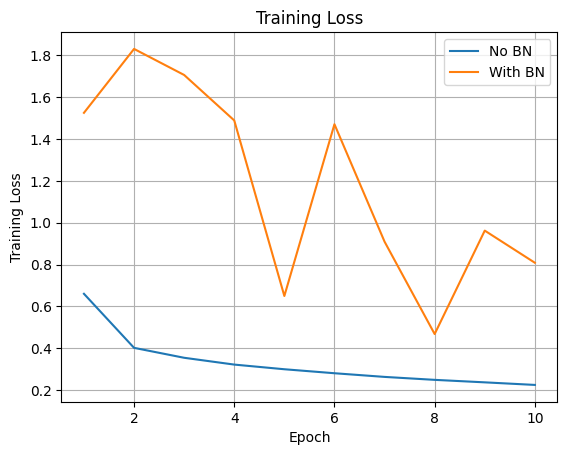

In [5]:
epochs = range(1, EPOCHS + 1)

plt.plot(epochs, results["NoBN"]["loss"], label="No BN")
plt.plot(epochs, results["BN"]["loss"], label="With BN")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss")
plt.legend()
plt.grid()
plt.show()


# Plot train accuracy

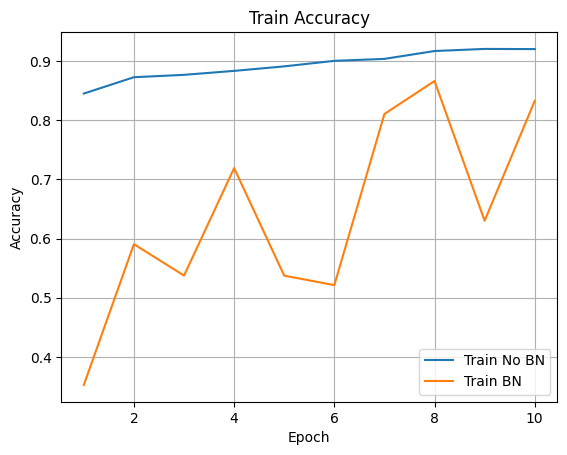

In [6]:
plt.plot(epochs, results["NoBN"]["train_acc"], label="Train No BN")
plt.plot(epochs, results["BN"]["train_acc"], label="Train BN")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train Accuracy")
plt.legend()
plt.grid()
plt.show()

# Plot Test accuracy

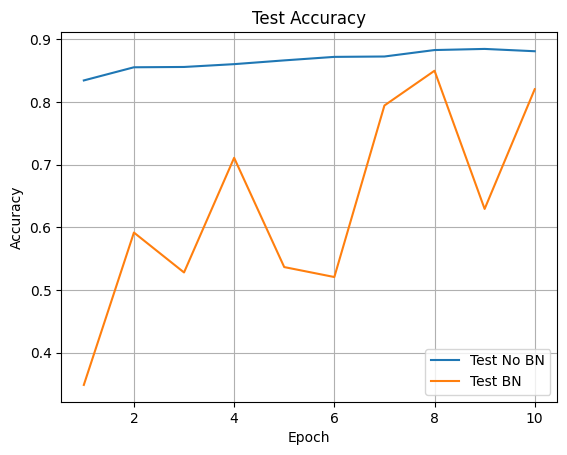

In [7]:
plt.plot(epochs, results["NoBN"]["test_acc"], label="Test No BN")
plt.plot(epochs, results["BN"]["test_acc"], label="Test BN")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Test Accuracy")
plt.legend()
plt.grid()
plt.show()


# Plot gradient norms

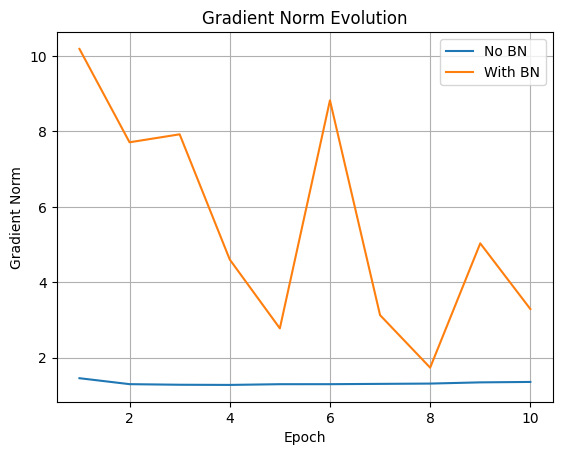

In [8]:
plt.plot(epochs, results["NoBN"]["grad_norm"], label="No BN")
plt.plot(epochs, results["BN"]["grad_norm"], label="With BN")
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.title("Gradient Norm Evolution")
plt.legend()
plt.grid()
plt.show()


##  LR = 0.6 & 15 epochs 

In [10]:
EPOCHS = 15
LR = 0.6
results = {}

for use_bn in [False, True]:
    name = "BN" if use_bn else "NoBN"

    model = MLP(input_dim=28 * 28, hidden_dims=(512, 256, 128), use_bn=use_bn).to(DEVICE)
    optimizer = torch.optim.SGD(model.parameters(), lr=LR)

    results[name] = {
        "loss": [],
        "grad_norm": [],
        "train_acc": [],
        "test_acc": []
    }

    for epoch in trange(EPOCHS, desc=f"Epochs ({name})"):
        loss, gnorm = train_epoch(model, train_loader, optimizer, DEVICE)
        train_acc = evaluate(model, train_loader, DEVICE)
        test_acc = evaluate(model, test_loader, DEVICE)

        results[name]["loss"].append(loss)
        results[name]["grad_norm"].append(gnorm)
        results[name]["train_acc"].append(train_acc)
        results[name]["test_acc"].append(test_acc)

        

Epochs (NoBN):   0%|          | 0/15 [00:00<?, ?it/s]

Epochs (BN): 100%|██████████| 15/15 [06:59<00:00, 27.96s/it]


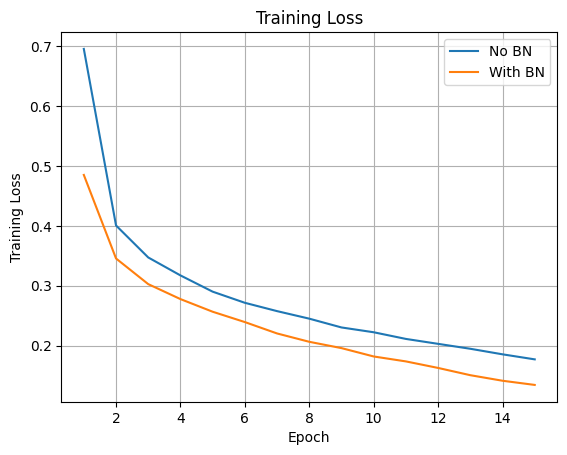

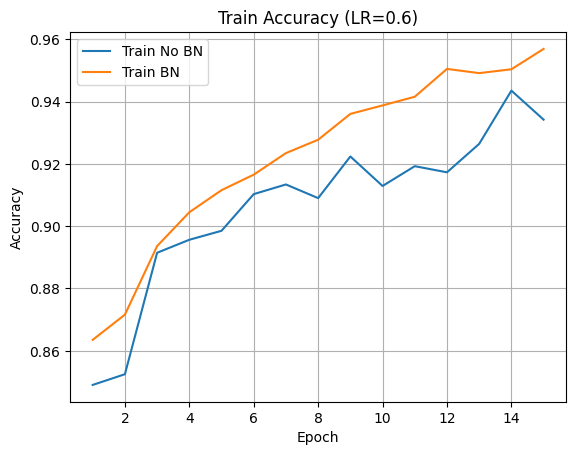

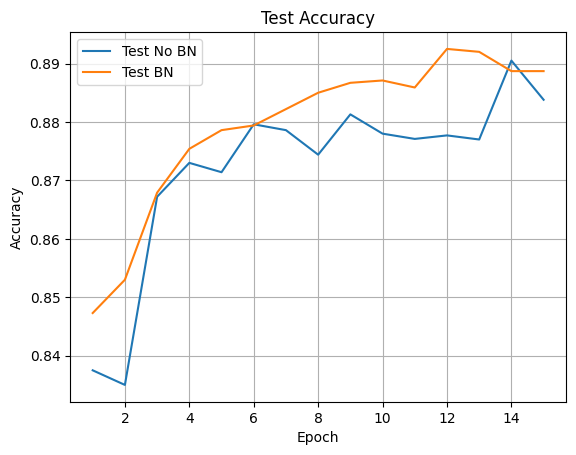

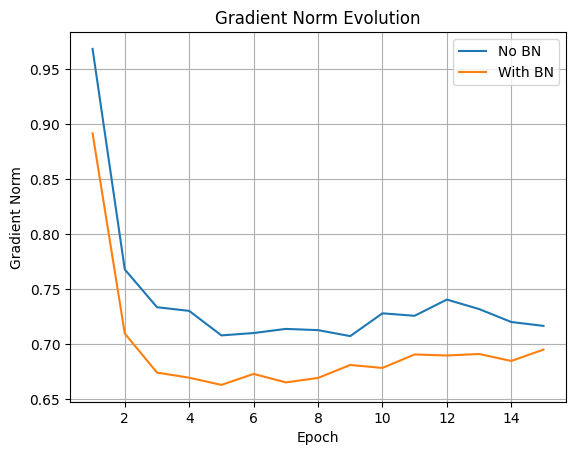

In [11]:
epochs = range(1, EPOCHS + 1)

plt.plot(epochs, results["NoBN"]["loss"], label="No BN")
plt.plot(epochs, results["BN"]["loss"], label="With BN")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss")
plt.legend()
plt.grid()
plt.show()

plt.plot(epochs, results["NoBN"]["train_acc"], label="Train No BN")
plt.plot(epochs, results["BN"]["train_acc"], label="Train BN")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train Accuracy (LR=0.6)")
plt.legend()
plt.grid()
plt.show()

plt.plot(epochs, results["NoBN"]["test_acc"], label="Test No BN")
plt.plot(epochs, results["BN"]["test_acc"], label="Test BN")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Test Accuracy")
plt.legend()
plt.grid()
plt.show()

plt.plot(epochs, results["NoBN"]["grad_norm"], label="No BN")
plt.plot(epochs, results["BN"]["grad_norm"], label="With BN")
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.title("Gradient Norm Evolution")
plt.legend()
plt.grid()
plt.show()
